# `FL007_prelim_results` (work in progress)

In [1]:
%load_ext watermark
%watermark -a "Etienne Ackermann," -n -t -v -p nelpy,numpy,scipy,pandas

C:\Users\etien\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.


Etienne Ackermann, Mon Dec 04 2017 09:46:44 

CPython 3.6.3
IPython 6.1.0

nelpy 0.1.1
numpy 1.12.1
scipy 0.19.1
pandas 0.21.0


# Overview

Here I will create some plots and notes for the Asilomar paper; but the results are preliminary... 

Specifically, I want to show several examples from the 'representative' session, Bon Day3, showing when the HMM failed, when it succeeded, and the same for some of the regression analysis ones.

For the paper, I can show the HMM transmat, obs mat, LSPFs, and some example identified remote replays.

For the regression analysis, I can show the decoded trajectory, maze, and animal location.

The paper would argue, of course, that we can use the HMMs to do similar analyses as with the regression analysis, but without the need to linearize or otherwise simplify the environment (linearization introduces a decoding ambiguity, even in the simple w-maze). Moreover, if we have sufficiently many SWR events (hypothetical) we may be able to perform this type of analysis without ever having observed the remote context (exciting!)

**Notes:**

(remote HMM Bon Day3):

13 ran back and forth on center arm (good to show trajectory, since local is all messed up)

14 truly messed up

15 _could_ make sense

20 seems plausible

22 is good in ONLY E1a-raw

29, 30 are fails

33 only bad in E1a-ideal

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

import nelpy as nel
import nelpy.io
import nelpy.plotting as npl

%matplotlib inline

warnings.filterwarnings("ignore")

### Load semi-processed Frank Lab data

In [2]:
fileroot = '../../../../neoReader/' 
infile = 'FrankLabData-BonConFra-no-eeg06d.nel' # saved with Pandas=0.21
FrankLabData = nel.load_pkl(fileroot + infile) 
data = FrankLabData.data
sessions = FrankLabData.sessions

In [3]:
animal, day = 'Bon', 'Day3'

np.argwhere(data[animal][day]['remote_replay_E1_in_E2']['pvals_remote_candidates'] < 0.05).squeeze()

array([ 0,  1,  3,  4,  5,  6,  9, 10, 14, 15, 16, 18, 19, 21, 22, 23, 26,
       28, 30, 31, 33, 34, 35])

In [4]:
np.argwhere(data[animal][day]['remote_replay_E1_in_E2']['pvals_remote_hmm'] < 0.03).squeeze()

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 12, 13, 14, 16, 20, 22, 23, 27,
       28, 29, 30, 31, 33, 35])

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe2f6699390>,
 <matplotlib.image.AxesImage at 0x7fe2f63bfd68>)

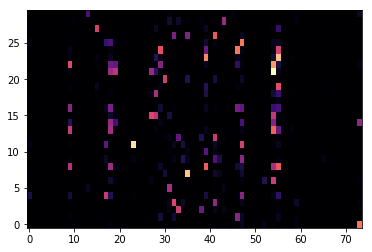

In [5]:
npl.imagesc(data[animal][day]['HMM_E1'].means_, cmap=plt.cm.magma)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe2f66a1cf8>,
 <matplotlib.image.AxesImage at 0x7fe2f63b9c18>)

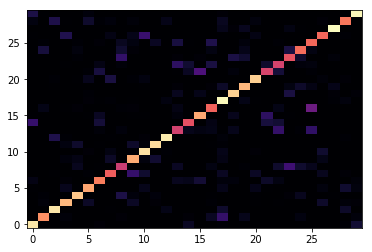

In [6]:
npl.imagesc(data[animal][day]['HMM_E1'].transmat_, cmap=plt.cm.magma)

In [7]:
n_sig_local = 0
n_tot_local = 0

n_sig_remote = 0
n_tot_remote = 0

for animal, day in [sessions[1]]:
    try:
        # local
        x = data[animal][day]['remote_replay_E1_in_E2']['pvals_local_candidates']
        n_sig_local += np.count_nonzero(x<0.05)
        n_tot_local += len(x)
        # remote
        x = data[animal][day]['remote_replay_E1_in_E2']['pvals_remote_candidates']
        n_sig_remote += np.count_nonzero(x<0.05)
        n_tot_remote += len(x)
    except KeyError:
        continue

print('{} of {} ({:1.1f}%) candidate replay events showed statistically significant replay (P < 0.05) of environment 1 when rats were located in environment 2.'.format(n_sig_remote, n_tot_remote, n_sig_remote/n_tot_remote*100))
print('\nAs expected, there were also many replays of environment 2; {} of {} ({:1.1f}%) candidate events were significant.'.format(n_sig_local, n_tot_local, n_sig_local/n_tot_local*100))


23 of 36 (63.9%) candidate replay events showed statistically significant replay (P < 0.05) of environment 1 when rats were located in environment 2.

As expected, there were also many replays of environment 2; 10 of 22 (45.5%) candidate events were significant.


In [8]:
n_sig_local = 0
n_tot_local = 0

n_sig_remote = 0
n_tot_remote = 0

for animal, day in [sessions[1]]:
    try:
        # local
        x = data[animal][day]['remote_replay_E1_in_E2']['pvals_local_hmm']
        n_sig_local += np.count_nonzero(x<0.05)
        n_tot_local += len(x)
        # remote
        x = data[animal][day]['remote_replay_E1_in_E2']['pvals_remote_hmm']
        n_sig_remote += np.count_nonzero(x<0.03)
        n_tot_remote += len(x)
    except KeyError:
        continue

print('{} of {} ({:1.1f}%) candidate replay events showed statistically significant replay (P < 0.05) of environment 1 when rats were located in environment 2.'.format(n_sig_remote, n_tot_remote, n_sig_remote/n_tot_remote*100))
print('\nAs expected, there were also many replays of environment 2; {} of {} ({:1.1f}%) candidate events were significant.'.format(n_sig_local, n_tot_local, n_sig_local/n_tot_local*100))


23 of 36 (63.9%) candidate replay events showed statistically significant replay (P < 0.05) of environment 1 when rats were located in environment 2.

As expected, there were also many replays of environment 2; 10 of 22 (45.5%) candidate events were significant.


In [9]:
all_remote_pvals_hmm = []
all_remote_pvals_r2 = []

for animal, day in [sessions[1]]:
    try:
        # remote
        x = data[animal][day]['remote_replay_E1_in_E2']['pvals_remote_hmm']
        all_remote_pvals_hmm = np.append(all_remote_pvals_hmm,x)
        x = data[animal][day]['remote_replay_E1_in_E2']['pvals_remote_candidates']
        all_remote_pvals_r2 = np.append(all_remote_pvals_r2,x)
    except KeyError:
        continue

In [10]:
hmmsig = set(np.argwhere(all_remote_pvals_hmm < 0.03).squeeze()) # maybe should consider 0.15
r2sig = set(np.argwhere(all_remote_pvals_r2 < 0.05).squeeze())

In [11]:
len(hmmsig)

23

In [12]:
len(hmmsig.intersection(r2sig))

16

In [13]:
import tabulate
import scipy.stats as stats

from IPython.display import HTML, display, clear_output

In [14]:
threshold_r2 = 0.05
threshold_hmm = 0.05

n_events_total = 0
n_HS_BS = 0
n_HS_BNS = 0
n_HNS_BS = 0
n_HNS_BNS = 0
    
for animal, day in sessions:
    try:
        n_events = len(data[animal][day]['remote_replay_E1_in_E2']['pvals_remote_candidates'])
        n_events_total += n_events
        idx_all = set(range(n_events))
        BS = set(np.where(data[animal][day]['remote_replay_E1_in_E2']['pvals_remote_candidates']<=threshold_r2)[0])
        BNS = idx_all - BS
    #     raise NotImplementedError
        HS = set(np.where(data[animal][day]['remote_replay_E1_in_E2']['pvals_remote_hmm']<=threshold_hmm)[0])
        HNS = set(np.where(data[animal][day]['remote_replay_E1_in_E2']['pvals_remote_hmm']>threshold_hmm)[0])
        BS_HS = np.array(list(BS.intersection(HS))).astype(int)
        BS_HNS = np.array(list(BS.intersection(HNS))).astype(int)
        BNS_HS = np.array(list(BNS.intersection(HS))).astype(int)
        BNS_HNS = np.array(list(BNS.intersection(HNS))).astype(int)

        n_HS_BS += len(BS_HS)
        n_HS_BNS += len(BNS_HS)
        n_HNS_BS += len(BS_HNS)
        n_HNS_BNS += len(BNS_HNS)
    except KeyError:
        continue

conf_mat = np.array([[n_HS_BNS, n_HS_BS],[n_HNS_BNS, n_HNS_BS]])

table = [["HMM +", n_HS_BS, n_HS_BNS, n_HS_BS+n_HS_BNS],
         ["HMM -", n_HNS_BS, n_HNS_BNS, n_HNS_BS + n_HNS_BNS],
        ["", n_HS_BS + n_HNS_BS, n_HS_BNS + n_HNS_BNS, ""]]
display(HTML(tabulate.tabulate(table, headers=["N={}".format(n_events_total),"R2 +", "R2 -", ""], tablefmt='html')))

oddsratio, p_value = stats.fisher_exact(np.array([[n_HS_BNS, n_HS_BS],[n_HNS_BNS, n_HNS_BS]]), alternative='two-sided')
print("Fisher's exact test, two-tailed p value:", p_value)

print('{:1.1f}% event agreement'.format((n_HS_BS + n_HNS_BNS) / n_events_total*100))


N=623,R2 +,R2 -,
HMM +,131,57,188
HMM -,139,296,435
,270,353,


Fisher's exact test, two-tailed p value: 3.17016877173e-18
68.5% event agreement


# Some additional figures from Mattias' paper

Locations of significant E2 replay events in E2. Grey traces represent all positions; blue dots represents positions at which there was a significant local replay event.


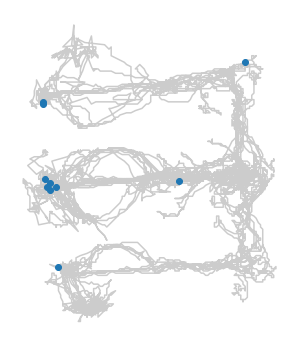

In [62]:
# See e.g. supplemental fig 4

animal, day = 'Bon', 'Day3'
epidx = 5

sig_local_bool = data[animal][day]['remote_replay_E1_in_E2']['pvals_local_candidates'] < 0.05
sig_local_IDs = data[animal][day]['remote_replay_E1_in_E2']['local_candidate_SWR_IDs'][sig_local_bool]
sig_local_ripples = data[animal][day]['remote_replay_E1_in_E2']['all_ripples'][sig_local_IDs]
sig_local_ripples

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_aspect('equal')
npl.utils.clear_left_right()
npl.utils.clear_top_bottom()
npl.plot2d(data[animal][day]['pos'][epidx], c='0.8')
x, y = data[animal][day]['pos'](sig_local_ripples.centers)
plt.plot(x, y, 'o')

print('Locations of significant E2 replay events in E2. Grey traces represent all positions; blue dots represents positions at which there was a significant local replay event.')

Five seconds before (red) and after (green) significant E2 ripple events in E2


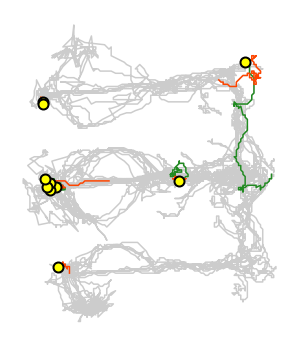

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_aspect('equal')
npl.utils.clear_left_right()
npl.utils.clear_top_bottom()

npl.plot2d(data[animal][day]['pos'][epidx], c='0.8')
x, y = data[animal][day]['pos'](sig_local_ripples.centers)
npl.plot2d(data[animal][day]['pos'][nel.EpochArray(sig_local_ripples.centers, duration=5)], c='forestgreen')
npl.plot2d(data[animal][day]['pos'][nel.EpochArray(sig_local_ripples.centers-5, duration=5)], c='orangered')
plt.plot(x,y,'o', mec='k', mfc='yellow', mew=2, markersize=10)
print('Five seconds before (red) and after (green) significant E2 ripple events in E2')

# Visualize LSPFs/VTCs

In [28]:
st = data[animal][day]['spikes']

In [46]:
st.iloc[:,placecells].unit_ids

[array([31]), array([43]), array([54]), array([55])]

In [50]:
placecells = np.argwhere(st.n_spikes/st.support.duration > 1)
print(placecells)
st.iloc[:,placecells].unit_ids

[[31]
 [43]
 [54]
 [55]]


[array([31]), array([43]), array([54]), array([55])]

In [49]:
placecells = np.argwhere(st.n_spikes/st.support.duration > 1).squeeze()
print(placecells)
st.iloc[:,placecells].unit_ids

[31 43 54 55]


[31, 43, 54, 55]

In [27]:
data[animal][day]['spikes'].iloc[:,0]

<SpikeTrainArray at 0x1709bd32320: 1 units (7 segments)> at 10000 Hz

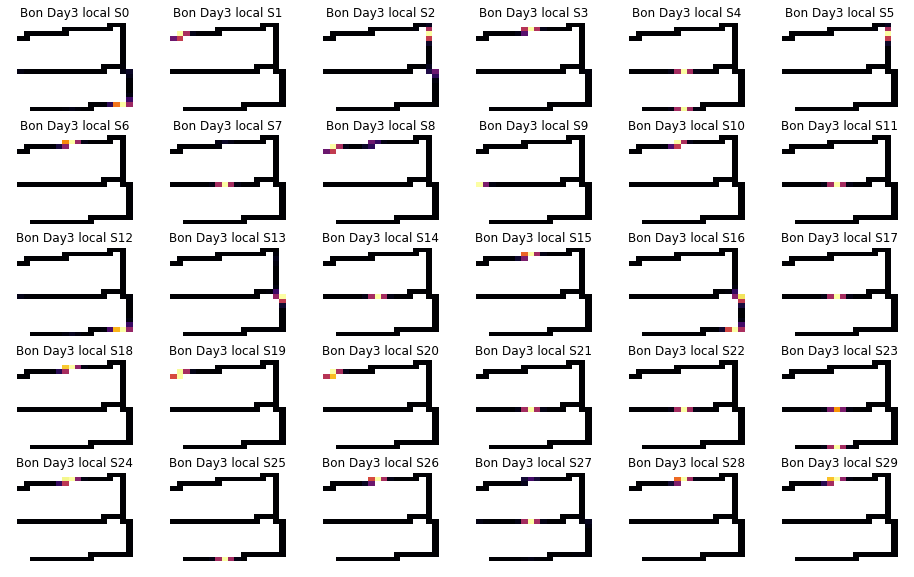

In [273]:
animal = 'Bon'
day = 'Day3'
sigma_tc=4

def plot_all_VTCs_local(data, animal, day, sigma_tc):
    try:
#         vtc = data[animal][day]['VTC_E1']
        vtc = data[animal][day]['VTC_E2']
    except KeyError:
        raise ValueError('The (animal, day) pair does not have a VTC; aborting...')
        
    ax_rows = 5
    ax_cols = 6
    n_axes = ax_rows * ax_cols
    
    n_units = vtc.n_units
    
    assert n_axes >= n_units, 'not enough axes for all units!'
    
    fig, axes = plt.subplots(ax_rows, ax_cols, figsize=(16, 10))
    for unit, ax in enumerate(axes.ravel()[:n_units]):
        pass
        npl.utils.clear_left_right(ax)
        npl.utils.clear_top_bottom(ax)
#         maxcbrate = 0.65*np.round(np.nanmax(tuning_curves[epidx].smooth(sigma=0).ratemap[unit,:,:])*10)/10
        _, img = npl.imagesc(vtc.smooth(sigma=sigma_tc).ratemap[unit,:,:].T, cmap=plt.cm.inferno, ax=ax)
        ax.set_title(animal + ' ' + str(day) + ' local S' + str(unit))
            
    
plot_all_VTCs_local(data=data, 
                    animal=animal,
                    day=day,
                    sigma_tc=sigma_tc)

# npl.savefig('lspf-local-small')

pdf saved successfully...
png saved successfully...


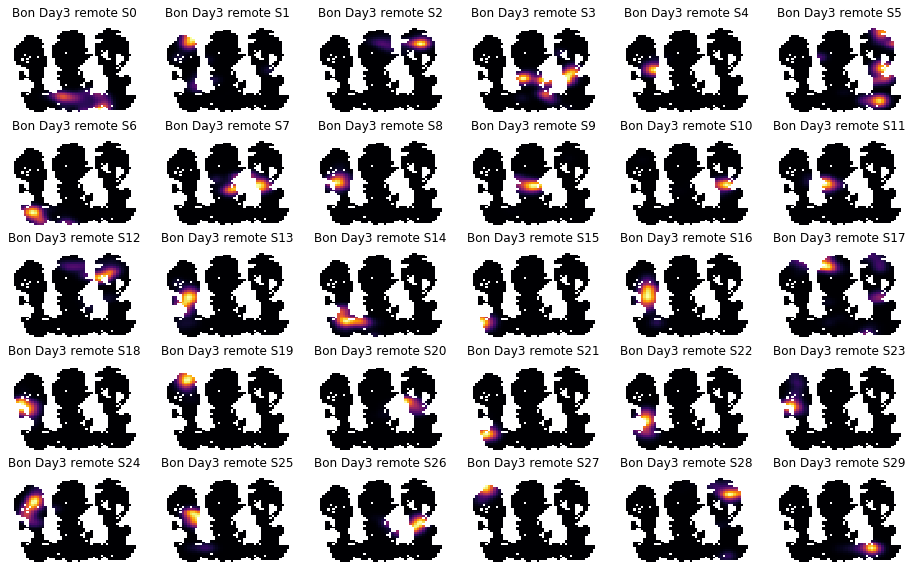

In [284]:
animal = 'Bon'
day = 'Day3'
sigma_tc=4

def plot_all_VTCs_remote(data, animal, day, sigma_tc):
    try:
        vtc = data[animal][day]['VTC_E1']
#         vtc = data[animal][day]['VTC_E2']
    except KeyError:
        raise ValueError('The (animal, day) pair does not have a VTC; aborting...')
        
    ax_rows = 5
    ax_cols = 6
    n_axes = ax_rows * ax_cols
    
    n_units = vtc.n_units
    
    assert n_axes >= n_units, 'not enough axes for all units!'
    
    fig, axes = plt.subplots(ax_rows, ax_cols, figsize=(16, 10))
    for unit, ax in enumerate(axes.ravel()[:n_units]):
        pass
        npl.utils.clear_left_right(ax)
        npl.utils.clear_top_bottom(ax)
#         maxcbrate = 0.65*np.round(np.nanmax(tuning_curves[epidx].smooth(sigma=0).ratemap[unit,:,:])*10)/10
        _, img = npl.imagesc(vtc.smooth(sigma=sigma_tc).ratemap[unit,:,:].T, cmap=plt.cm.inferno, ax=ax)
        ax.set_title(animal + ' ' + str(day) + ' remote S' + str(unit))
    
plot_all_VTCs_remote(data=data, 
                     animal=animal,
                     day=day,
                     sigma_tc=sigma_tc)

# npl.savefig('lspf-2d')

### Save augmented data

In [193]:
FrankLabData = nel.ResultsContainer(data=data,
                                    sessions=FrankLabData.sessions,
                                    cellinfo=FrankLabData.cellinfo,
                                    taskinfo=FrankLabData.taskinfo,
                                    tetinfo=FrankLabData.tetinfo,
                                    description=FrankLabData.description)

FrankLabData.save_pkl(fileroot + outfile)

To try:
- different training ds
- E1a and E1b seperately
- scaling of E2 SWR sequences?
- scaling Lambda mat?

# Supplemental: re-estimate VTCs

In [279]:
ds_HMM = 0.125
ds_25ms = 0.025

def sub2ind(array_shape, rows, cols):
    return rows*array_shape[1] + cols

def append_ASAs(a, b):
    """Very dumb append; does not check for overlaps or anything... use at your own risk!"""
    c = nel.AnalogSignalArray(empty=True)
    c._ydata = np.hstack((a.ydata, b.ydata))
    c._fs = a.fs
    c._time = np.hstack((a.time, b.time))
    c._support = a.support + b.support
    
    return c

def get_vtc2d(hmm, bst, pos, nx=50, ny=50):
    
    num_states = hmm.n_components
    xpos, ypos = pos.asarray(at=bst.centers).yvals
    
    ext_xmin, ext_xmax = np.floor(pos[:,0].min()/10)*10-1, np.ceil(pos[:,0].max()/10)*10+1
    ext_ymin, ext_ymax = np.floor(pos[:,1].min()/10)*10-1, np.ceil(pos[:,1].max()/10)*10+1
    
    xx_left = np.linspace(ext_xmin, ext_xmax, nx+1)
    xx_mid = np.linspace(ext_xmin, ext_xmax, nx+1)[:-1]; xx_mid += (xx_mid[1]-xx_mid[0])/2
    yy_left = np.linspace(ext_ymin, ext_ymax, ny+1)
    yy_mid = np.linspace(ext_ymin, ext_ymax, ny+1)[:-1]; yy_mid += (yy_mid[1]-yy_mid[0])/2

    ext_y = np.digitize(ypos, yy_left) - 1 # spatial bin numbers
    ext_x = np.digitize(xpos, xx_left) - 1

    t = np.zeros(len(xpos), dtype=np.float)

    for ii, (x, y) in enumerate(zip(ext_x, ext_y)):
        t[ii] = sub2ind((nx, ny), x, y)

    t[t==0] = np.nan
    t[t>=nx*ny] = np.nan

    extern = hmm.fit_ext(X=bst, ext=t, n_extern=nx*ny)
    # transform into ratemap shape
    tmp = np.reshape(extern, (num_states, nx, ny))
    vtc_ratemap = np.transpose(tmp, (0,2,1)) # for images, we have (y,x) <==> (r,c) coordinates

    vtc2d = nel.TuningCurve2D(ratemap=vtc_ratemap, min_duration=0, ext_xmin=ext_xmin, ext_xmax=ext_xmax, ext_ymin=ext_ymin, ext_ymax=ext_ymax)
#     vtc2d = vtc2d.smooth(sigma=sigma_tc)
    vtc2d._initialize_mask_from_extern(pos)
    
    return vtc2d

sigma_spk = 0.3 # 300 ms spike smoothing

for animal, day in [sessions[1]]:
    print(animal, day)
    
    try:
        hmmE1 = data[animal][day]['HMM_E1']
        hmmE2 = data[animal][day]['HMM_E2']
    except KeyError:
        print('The (animal, day) pair does not have an HMM; skipping...')
        continue
        
    run_epochs = data[animal][day]['run_epochs']
    ripple_epochs = data[animal][day]['ripple_epochs']
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        st = data[animal][day]['spikes'][[1,3],:] # use E1 and E3 combined

    if st.isempty: # this is true for Fra Day3 epoch 0
        pass
    else:
        # get spiketrain during run bouts for epoch
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            st_run_no_ripples = st[run_epochs][~ripple_epochs]
            
        # smooth and re-bin:
        bst = st_run_no_ripples.bin(ds=ds_25ms).smooth(sigma=sigma_spk, inplace=True).rebin(w=ds_HMM/ds_25ms)

        # we use the idealized position (2D) to learn the place fields...
        pos = append_ASAs(data[animal][day]['pos'][1], data[animal][day]['pos'][3])
        
        vtc2d = get_vtc2d(hmm=hmmE1, bst=bst, pos=pos)     
        data[animal][day]['VTC_E1'] = vtc2d
        
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        st = data[animal][day]['spikes'][[5],:] # use E2

    if st.isempty: # this is true for Fra Day3 epoch 0
        pass
    else:
        # get spiketrain during run bouts for epoch
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            st_run_no_ripples = st[run_epochs][~ripple_epochs]
            
        # smooth and re-bin:
        bst = st_run_no_ripples.bin(ds=ds_25ms).smooth(sigma=sigma_spk, inplace=True).rebin(w=ds_HMM/ds_25ms)

        # we use the idealized position (2D) to learn the place fields...
        pos = data[animal][day]['pos'][5]
        
        vtc2d = get_vtc2d(hmm=hmmE2, bst=bst, pos=pos)     
        data[animal][day]['VTC_E2'] = vtc2d

Bon Day3


In [280]:
5+5

10